In [3]:
options(warn = -1)
library(tidyquant)
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:xts':

    first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [11]:
ibov <- tq_get("^GSPC", from = "1970-01-01")
ibov_m <- na.omit(ibov) %>%
  mutate(date = format(date,"%Y-%m-01")) %>%
  group_by(date) %>%
  summarise(close = last(close))
ibov_m[,"Retorno_mensal"] <- matrix(0, nrow = nrow(ibov_m), ncol = 1)
for(i in 2:nrow(ibov_m)){
  ibov_m$Retorno_mensal[i] <- (ibov_m$close[i]/ibov_m$close[i-1]-1)
}
ibov_m$date <- as.Date(ibov_m$date, "%Y-%m-%d")

`summarise()` ungrouping output (override with `.groups` argument)



`summarise()` ungrouping output (override with `.groups` argument)



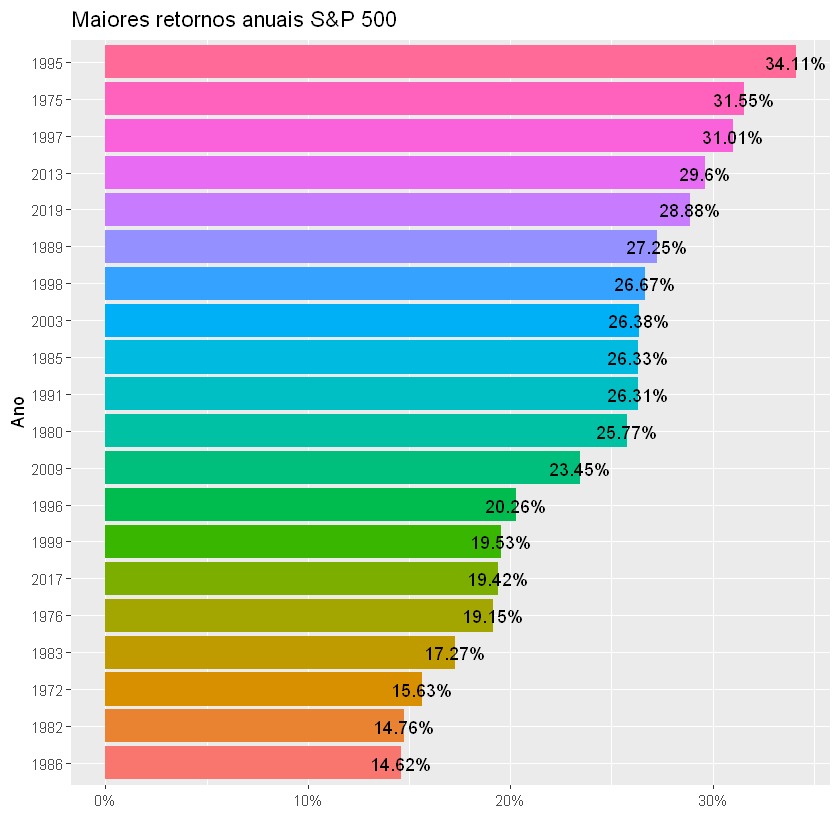

In [12]:
ibov_a <- ibov_m %>%
  mutate(date = year(date)) %>%
  group_by(date) %>%
  summarise(close = last(close), retorno = prod(Retorno_mensal+1)-1)
ibov_a %>%
  ungroup() %>%
  top_n(20,retorno) %>%
  mutate(date = reorder(date, retorno)) %>%
  ggplot(aes(x = retorno, y = date))+
  geom_col(aes(fill = date))+
  scale_x_continuous(labels = scales::percent)+
  labs(x = "", y = "Ano", title = "Maiores retornos anuais S&P 500")+
  theme(legend.position = "none")+
  geom_text(aes(label = paste0(round(retorno*100,2),"%")))

In [13]:
anos_pos <- matrix(0, nrow = nrow(ibov_a), ncol = 1)
for(i in 1:nrow(ibov_a)){
  if(ibov_a$retorno[i] == 0){
    anos_pos[i] <- "Nulo"
  } else{
    if(ibov_a$retorno[i] > 0){
      anos_pos[i] <- "Positivo"
    } else{
      if(ibov_a$retorno[i] < 0){
        anos_pos[i] <- "Negativo"
      }
    }
  }
}
anos_pos <- data.frame(Resultado = anos_pos)

`summarise()` ungrouping output (override with `.groups` argument)



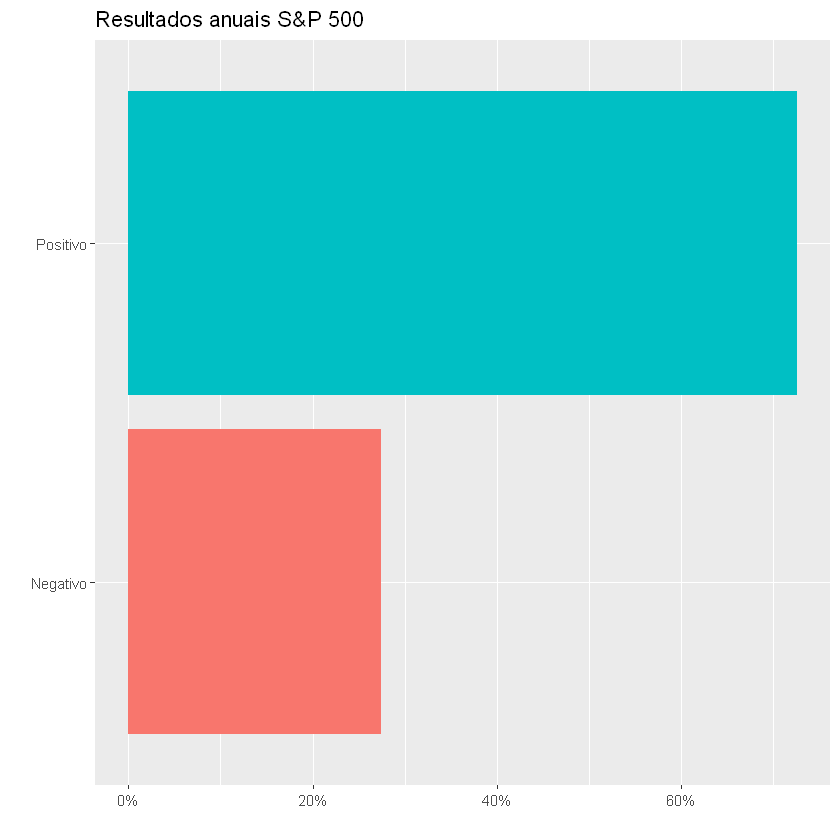

In [14]:
anos_pos1 <- anos_pos %>%
  group_by(Resultado) %>%
  summarise(Porcentagem = (Resultado = n())/nrow(anos_pos))
anos_pos1 %>%
  ungroup() %>%
  top_n(2, Porcentagem) %>%
  mutate(Resultado = reorder(Resultado, Porcentagem)) %>%
  ggplot(aes(x = Porcentagem, y = Resultado))+
  geom_col(aes(fill = Resultado))+
  theme(legend.position = "none")+
  scale_x_continuous(labels = scales::percent)+
  labs(x = "", y = "", title = "Resultados anuais S&P 500")